<a href="https://colab.research.google.com/github/abnermassimo1/Metodos-Numericos/blob/main/Polinomio_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POLINOMIO DE LAGRANGE**

La idea principal es construir un conjunto de polinomios base, llamados polinomios de Lagrange, que tienen la siguiente propiedad: cada polinomio base vale 1 en uno de los puntos de interpolación y 0 en todos los demás.

Luego, el polinomio de Lagrange se construye como una combinación lineal de estos polinomios base, donde los coeficientes son los valores de la función en los puntos de interpolación.

El polinomio de Lagrange de grado n que interpola los puntos (x0, y0), (x1, y1), ..., (xn, yn) está dado por:

$$P(x) = \sum_{i=0}^{n} y_i \cdot L_i(x)$$

In [17]:
# Importamos las bibliotecas necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Definimos la variable simbólica x
x = sp.symbols('x')

# Definimos los puntos a interpolar
puntos = [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

# Función para calcular el polinomio de Lagrange
def polinomio_lagrange_sympy(puntos, x):

    n = len(puntos)
    polinomio = 0  # Inicializamos el polinomio

    # Iteramos sobre los puntos para construir el polinomio
    for i in range(n):
        # Calculamos el i-ésimo polinomio base de Lagrange (Li)
        Li = 1
        for j in range(n):
            if i != j:
                Li *= (x - puntos[j][0]) / (puntos[i][0] - puntos[j][0])
        # Agregamos la contribución de Li al polinomio total
        polinomio += puntos[i][1] * Li

    return polinomio

Polinomio de Lagrange:
(5/4 - x/4)*(4/3 - x/3)*(3/2 - x/2)*(2 - x) + 4*(5/3 - x/3)*(2 - x/2)*(3 - x)*(x - 1) + 9*(5/2 - x/2)*(4 - x)*(x/2 - 1/2)*(x - 2) + 16*(5 - x)*(x/3 - 1/3)*(x/2 - 1)*(x - 3) + 25*(x/4 - 1/4)*(x/3 - 2/3)*(x/2 - 3/2)*(x - 4)


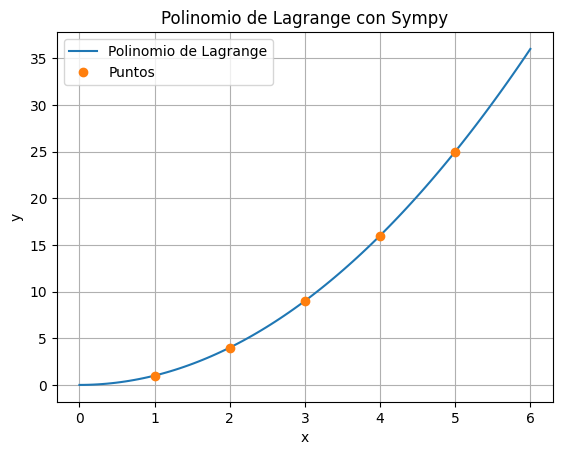

In [19]:
# Calculamos el polinomio de Lagrange
polinomio = polinomio_lagrange_sympy(puntos, x)

# Mostramos el polinomio de Lagrange
print("Polinomio de Lagrange:")
print(polinomio)

# Convertimos el polinomio de sympy a una función numérica para graficarlo
# Creamos una función lambda:  función_numérica = lambda x_val: polinomio.subs(x, x_val)
# Y la convertimos a numérica: función_numérica = sp.lambdify(x, polinomio, 'numpy')
funcion_numerica = sp.lambdify(x, polinomio, 'numpy')

# Generamos puntos para la gráfica
x_vals = np.linspace(0, 6, 100)  # 100 puntos entre 0 y 6
y_vals = funcion_numerica(x_vals)  # Evaluamos el polinomio en los puntos

# Graficamos el polinomio y los puntos originales
plt.plot(x_vals, y_vals, label='Polinomio de Lagrange')  # Graficamos el polinomio
plt.plot([p[0] for p in puntos], [p[1] for p in puntos], 'o', label='Puntos')  # Graficamos los puntos
plt.title('Polinomio de Lagrange con Sympy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Ingresa los valores de x separados por comas: 0, 0.6, 0.9
Ingresa los valores de y separados por comas: 0, 0.4700, 0.6418


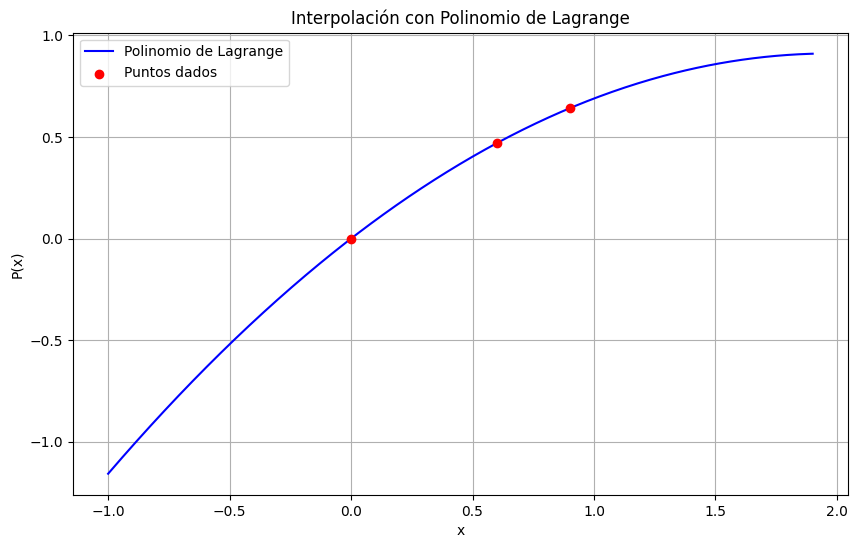

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función para construir el polinomio de Lagrange
def lagrange_interpolacion(x_vals, y_vals):

    n = len(x_vals)  # Número de puntos

    def L(k, x):
        # Calcula el polinomio base L_k(x)
        result = 1
        for j in range(n):
            if j != k:
                result *= (x - x_vals[j]) / (x_vals[k] - x_vals[j])
        return result

    def P(x):
        # Suma de los términos del polinomio de Lagrange
        total = 0
        for k in range(n):
            total += y_vals[k] * L(k, x)
        return total

    return P

# ------------------ ENTRADA DE DATOS ------------------

# Leer los valores desde consola
entrada_x = input("Ingresa los valores de x separados por comas: ")
entrada_y = input("Ingresa los valores de y separados por comas: ")

# Convertir las cadenas de entrada a arreglos numpy
x_puntos = np.array([float(x) for x in entrada_x.split(",")])
y_puntos = np.array([float(y) for y in entrada_y.split(",")])

# Validar que la cantidad de puntos coincida
if len(x_puntos) != len(y_puntos):
    print("Error: la cantidad de valores de x y y debe ser la misma.")
    exit()

# ------------------ CÁLCULO DEL POLINOMIO ------------------

# Construir el polinomio interpolante
P = lagrange_interpolacion(x_puntos, y_puntos)

# Crear puntos para graficar suavemente el polinomio
x_plot = np.linspace(min(x_puntos) - 1, max(x_puntos) + 1, 500)
y_plot = [P(xi) for xi in x_plot]

# ------------------ GRAFICAR ------------------

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Polinomio de Lagrange', color='blue')
plt.scatter(x_puntos, y_puntos, color='red', zorder=5, label='Puntos dados')
plt.title("Interpolación con Polinomio de Lagrange")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid(True)
plt.legend()
plt.show()